In [56]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns

In [57]:
df = pd.read_csv("data_nomiss.csv")
df.head()

,Unnamed: 0,zip,JobsT_1998,ArtsN_1998,ArtsW_1998,JobsN_1998,JobsW_1998,ArtSupport_1998,JobsT_1999,ArtsN_1999,...,Pop1990,RentMed,Democ92,NonWhite_90,CollProfLv90,CrimeRate1999county,ARTGOSLG98,City,State,Location
0,1,1001,8306,149,993,8157,7313,844,8743,97,...,456310,484,45.7,361,0.207581,5470,0.760918,AGAWAM,MA,NA-US-MA-AGAWAM
1,2,1002,7785,138,1287,7647,6498,1149,7832,98,...,146568,526,54.1,5342,0.653909,1974,0.667259,AMHERST,MA,NA-US-MA-AMHERST
2,6,1007,1483,6,212,1477,1271,206,1410,9,...,146568,526,54.1,180,0.288567,1974,0.072451,BELCHERTOWN,MA,NA-US-MA-BELCHERTOWN
3,8,1011,85,7,16,78,69,9,75,7,...,456310,484,45.7,31,0.145176,5470,1.927595,CHESTER,MA,NA-US-MA-CHESTER
4,10,1013,7897,24,446,7873,7451,422,6567,27,...,456310,484,45.7,1024,0.091500,5470,-0.430408,CHICOPEE,MA,NA-US-MA-CHICOPEE


In [88]:
df.describe()

,zip,JobsT_1998,ArtsN_1998,ArtsW_1998,JobsN_1998,JobsW_1998,ArtSupport_1998,JobsT_1999,ArtsN_1999,ArtsW_1999,...,housingdensity2000,housingdensity1990,Pop2000,Pop1990,RentMed,Democ92,NonWhite_90,CollProfLv90,CrimeRate1999county,ARTGOSLG98
count,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,...,10169.000000,10169.000000,10169.000000,1.016900e+04,10169.000000,10169.00000,10169.000000,10169.000000,10169.000000,10169.000000
mean,47367.216442,9418.082014,145.939227,1055.559740,9272.142787,8362.522274,909.620513,9611.336218,155.151539,1078.429639,...,974.581744,925.298533,20440.745796,7.303265e+05,452.302291,41.67812,3584.949454,0.219836,4140.041794,-0.264184
std,30271.484353,10118.817491,293.699032,1241.388579,9950.676463,9116.788477,1044.722278,10347.568395,326.291510,1275.640215,...,1946.829125,2341.303636,15272.937678,1.473789e+06,130.191394,9.82808,7123.893806,0.134849,2046.552937,0.929096
min,1001.000000,6.000000,3.000000,3.000000,3.000000,3.000000,0.000000,6.000000,3.000000,3.000000,...,0.153692,0.006953,95.000000,4.670000e+02,182.000000,0.00000,0.000000,0.000000,45.000000,-4.560932
25%,20601.000000,2430.000000,18.000000,250.000000,2392.000000,2126.000000,213.000000,2524.000000,19.000000,257.000000,...,59.151169,33.249527,8425.000000,7.492900e+04,356.000000,35.20000,220.000000,0.119757,2585.000000,-0.813942
50%,45204.000000,6194.000000,57.000000,657.000000,6114.000000,5459.000000,576.000000,6366.000000,60.000000,671.000000,...,284.726252,182.547446,17298.000000,2.650380e+05,426.000000,41.00000,1037.000000,0.179975,3796.000000,-0.234975
75%,76012.000000,12727.000000,153.000000,1413.000000,12531.000000,11295.000000,1230.000000,12944.000000,161.000000,1441.000000,...,1203.269728,1055.503172,28959.000000,7.292680e+05,527.000000,47.50000,3628.000000,0.288696,5491.000000,0.312471
max,99929.000000,117839.000000,5151.000000,22375.000000,116036.000000,112340.000000,18650.000000,126024.000000,10894.000000,23681.000000,...,42141.219140,127396.187595,114124.000000,8.863164e+06,926.000000,84.60000,102388.000000,1.000000,20965.000000,4.002545


In [60]:
def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

In [61]:
df = df.drop("Unnamed: 0", axis=1)

In [62]:
df.head()

,zip,JobsT_1998,ArtsN_1998,ArtsW_1998,JobsN_1998,JobsW_1998,ArtSupport_1998,JobsT_1999,ArtsN_1999,ArtsW_1999,...,Pop1990,RentMed,Democ92,NonWhite_90,CollProfLv90,CrimeRate1999county,ARTGOSLG98,City,State,Location
0,1001,8306,149,993,8157,7313,844,8743,97,753,...,456310,484,45.7,361,0.207581,5470,0.760918,AGAWAM,MA,NA-US-MA-AGAWAM
1,1002,7785,138,1287,7647,6498,1149,7832,98,1304,...,146568,526,54.1,5342,0.653909,1974,0.667259,AMHERST,MA,NA-US-MA-AMHERST
2,1007,1483,6,212,1477,1271,206,1410,9,141,...,146568,526,54.1,180,0.288567,1974,0.072451,BELCHERTOWN,MA,NA-US-MA-BELCHERTOWN
3,1011,85,7,16,78,69,9,75,7,16,...,456310,484,45.7,31,0.145176,5470,1.927595,CHESTER,MA,NA-US-MA-CHESTER
4,1013,7897,24,446,7873,7451,422,6567,27,372,...,456310,484,45.7,1024,0.091500,5470,-0.430408,CHICOPEE,MA,NA-US-MA-CHICOPEE


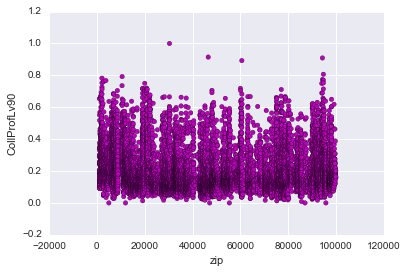

In [86]:
estimator = DBSCAN(eps=1, min_samples=5)
X = df[["JobsT_2014", "ArtsN_2014", "CollProfLv90", "zip", "medhhinc2k"]]
estimator.fit(X)
labels = estimator.labels_
colors = set_colors(labels)
plt.scatter(df['zip'], df['CollProfLv90'], c=colors)
plt.xlabel("zip")
plt.ylabel("CollProfLv90")
plt.show()

In [39]:
sns.clustermap(df[["JobsN_2014", "ArtsN_2014"]], method="complete")

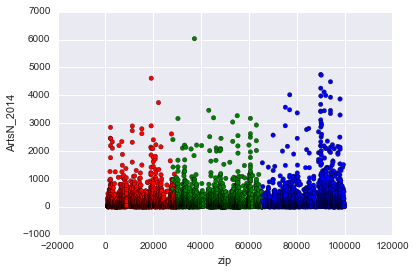

In [87]:
estimator = KMeans(n_clusters=3)
X = df[["JobsT_2014", "ArtsN_2014", "CollProfLv90", "zip"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_

colors = set_colors(labels)
plt.scatter(df['zip'], df['ArtsN_2014'], c=colors)
plt.xlabel("zip")
plt.ylabel("ArtsN_2014")
plt.show()

